In [24]:
# import requried packages 
from pathlib import Path
import pandas as pd
from functions.analysis_helper import calculate_iqr
from functions.wrapper_helper import open_query, sparql_query_to_dataframe

# General group functions

#### global warming potential

In [ ]:
# Global warming potential
endpoint = "http://localhost:3030/response_check/sparql" # Initialize SPARQL ENDPOINT
query_lca = open_query("queries/publication/global_warming_groups.rq")
result_impact = sparql_query_to_dataframe(query_lca, endpoint = endpoint)
result_impact["value"] = result_impact["value"].astype(float)
display(result_impact)

,grouplabel,foodname,food_item,impactlabel,value,impactunit
0,Mamallian meat food product,beef roast,https://data.rivm.nl/data/nvip/bigfood/lca24/i...,Global warming,22.825466,kg CO2 eq
1,Mamallian meat food product,"beef, smoked-dried",https://data.rivm.nl/data/nvip/bigfood/lca24/i...,Global warming,20.458994,kg CO2 eq
2,Mamallian meat food product,minced beef,https://data.rivm.nl/data/nvip/bigfood/lca24/i...,Global warming,18.983002,kg CO2 eq
3,Mamallian meat food product,minced beef shallow fried,https://data.rivm.nl/data/nvip/bigfood/lca24/i...,Global warming,18.983002,kg CO2 eq
4,Mamallian meat food product,beef frying steak,https://data.rivm.nl/data/nvip/bigfood/lca24/i...,Global warming,18.648376,kg CO2 eq
...,...,...,...,...,...,...
103,Plant fruit food product,banana,https://data.rivm.nl/data/nvip/bigfood/lca24/i...,Global warming,0.259699,kg CO2 eq
104,Plant fruit food product,pineapple,https://data.rivm.nl/data/nvip/bigfood/lca24/i...,Global warming,0.219746,kg CO2 eq
105,Plant fruit food product,"apple, w skin",https://data.rivm.nl/data/nvip/bigfood/lca24/i...,Global warming,0.213998,kg CO2 eq
106,Plant fruit food product,"apple, wo skin",https://data.rivm.nl/data/nvip/bigfood/lca24/i...,Global warming,0.213998,kg CO2 eq


In [26]:
# quartile calculation for (first quartile , mean, third quartile)
iqr_table = result_impact.groupby(["grouplabel"])["value"].apply(calculate_iqr)
pd.DataFrame(iqr_table)

,value
grouplabel,
Fish food product,"(1.0, 4.1, 5.1)"
Legume food product,"(1.2, 2.0, 2.7)"
Mamallian meat food product,"(7.1, 10.9, 15.9)"
Plant fruit food product,"(0.4, 1.1, 1.7)"


(-0.9537189187692457, 27.55147915277867)

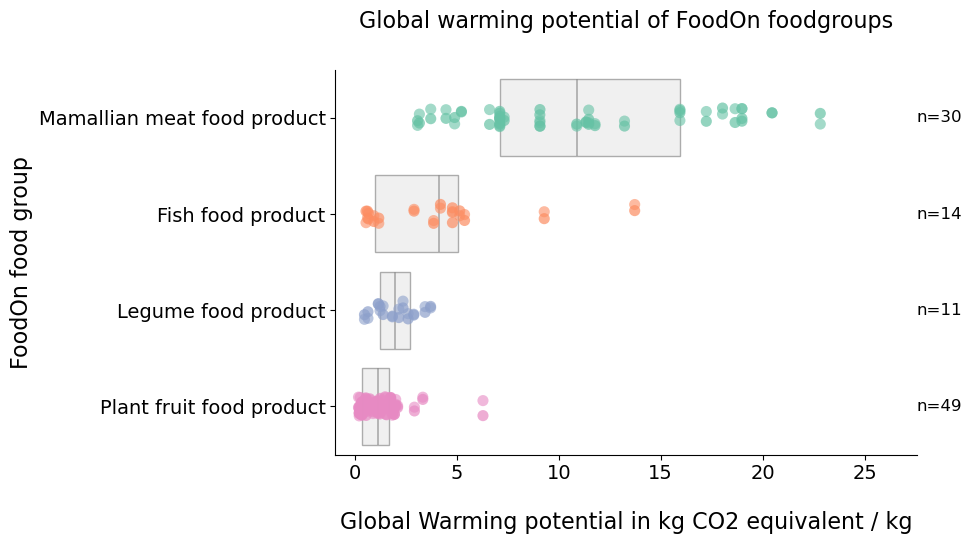

In [27]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
# figure impact 
import seaborn as sns

# path_figure_4b = "your_path_here"

order = ['Mamallian meat food product', 'Fish food product', 'Legume food product', 'Plant fruit food product'] 

palette = sns.color_palette("Set2")
palette_hex = [mcolors.rgb2hex(color) for color in palette][0:4] 
palette_hex

plt.figure(figsize =(7.5,5))
sns.stripplot(data=result_impact, y='grouplabel', hue = "grouplabel", x='value', 
              jitter= True, alpha =0.7, palette = "Set2", hue_order=order, order = order, size = 8)

sns.boxplot(
    data=result_impact,
    x="value",
    y="grouplabel",
    order=order,
    showmeans=True,
    meanline=True,
    meanprops={'color': '#8c8c8cb3', 'ls': '-', 'lw': 1.2},
    medianprops={'visible': False},
    whiskerprops={'visible': False},
    capprops={'visible': False},
    showfliers=False,
    boxprops={'facecolor': '#f0f0f0', 'edgecolor': "#8c8c8cb3"},
    zorder=1          # <--- behind
)

# --- Stripplot SECOND (in front) ---
sns.stripplot(
    data=result_impact,
    x='value',
    y='grouplabel',
    hue='grouplabel',
    order=order,
    hue_order=order,
    jitter=True,
    alpha=0.6,
    size=8,
    palette='Set2',
    zorder=2          # <--- in front
)
# Add titles and labels
sns.despine()
plt.title('Global warming potential of FoodOn foodgroups', pad = 30, fontsize = 16, ha = "center")
plt.xlabel('Global Warming potential in kg CO2 equivalent / kg', labelpad= 20, fontsize = 16, ha = "center")
plt.ylabel('FoodOn food group', fontsize = 16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


# --- Add counts (n) on the right side of each category ---
counts = result_impact.groupby("grouplabel")["foodname"].nunique()

ax = plt.gca()

# Get maximum x-value to place labels slightly outside the plot
xmax = ax.get_xlim()[1]

for i, group in enumerate(order):
    n = counts[group]
    ax.text(
        xmax + xmax*0.15,      # small offset outside the axis
        i,                     # y-position (category index)
        f"n={n}",
        va='center',
        ha='left',
        fontsize=12
    )

# Extend x-axis to make space for text
ax.set_xlim(right=xmax * 1.15)

# plt.show()
# plt.savefig(path_figure_4b, format='svg',  bbox_inches="tight", transparent = True)
# plt.savefig("figures/globalwarming_fig.svg", format='svg',  bbox_inches="tight")

#### protein content 

In [28]:
# Protein content
query_protein = open_query("queries/publication/protein_groups.rq")
result_protein = sparql_query_to_dataframe(query_protein, endpoint = endpoint)
result_protein["value"] = result_protein["value"].astype(float)
display(result_protein)

,grouplabel,foodname,nutrientclasslabel,value,unitlabel
0,Fish food product,Cod dried salted,Protein total,82.0,g
1,Mamallian meat food product,Beef salted dried Surinam,Protein total,65.0,g
2,Mamallian meat food product,Pork stewing meat prepared,Protein total,37.4,g
3,Mamallian meat food product,Pork gammon steak prepared,Protein total,37.1,g
4,Mamallian meat food product,Pork shoulder chop prepared,Protein total,37.1,g
...,...,...,...,...,...
403,Plant fruit food product,Apple sauce tinned,Protein total,0.2,g
404,Plant fruit food product,Apple sauce wo sugar tinned,Protein total,0.2,g
405,Plant fruit food product,Apple wo skin av,Protein total,0.2,g
406,Plant fruit food product,Pear w skin,Protein total,0.2,g


In [29]:
#Sanity check what kind of plant food products are high in protein
result_protein[(result_protein["value"] > 10) & (result_protein["grouplabel"] == "Plant fruit food product")]

,grouplabel,foodname,nutrientclasslabel,value,unitlabel
205,Plant fruit food product,Goji berries dried,Protein total,14.3,g
208,Plant fruit food product,Tomato sun-dried,Protein total,14.1,g
224,Plant fruit food product,Chilli powder,Protein total,12.0,g
226,Plant fruit food product,Pepper red cayenne,Protein total,12.0,g


In [30]:
# quartile calculation for (first quartile , mean, third quartile)
iqr_table = result_protein.groupby(["grouplabel"])["value"].apply(calculate_iqr)
pd.DataFrame(iqr_table)

,value
grouplabel,
Fish food product,"(17.6, 21.4, 23.8)"
Legume food product,"(4.4, 10.1, 14.6)"
Mamallian meat food product,"(16.8, 21.5, 25.8)"
Plant fruit food product,"(0.5, 1.5, 1.3)"


(-4.1000000000000005, 99.01499999999999)

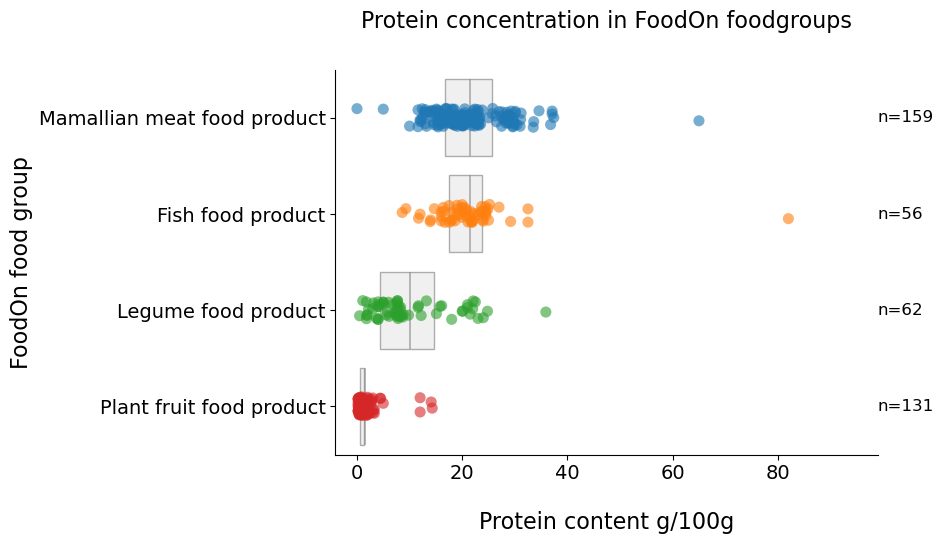

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# location to save the figure
# path_figure_4a = "your_path_here"

order = ['Mamallian meat food product', 'Fish food product', 
         'Legume food product', 'Plant fruit food product'] 

plt.figure(figsize =(7,5))

# --- Boxplot FIRST (behind), transparent box ---
sns.boxplot(
    data=result_protein,
    x="value",
    y="grouplabel",
    order=order,
    showmeans=True,
    meanline=True,
    meanprops={'color': '#8c8c8cb3', 'ls': '-', 'lw': 1.2},
    medianprops={'visible': False},
    whiskerprops={'visible': False},
    capprops={'visible': False},
    showfliers=False,
    boxprops={'facecolor': '#f0f0f0', 'edgecolor': "#8c8c8cb3"},
    zorder=1          # <--- behind
)

# --- Stripplot SECOND (in front) ---
sns.stripplot(
    data=result_protein,
    x='value',
    y='grouplabel',
    hue='grouplabel',
    order=order,
    hue_order=order,
    jitter=True,
    alpha=0.6,
    size=8,
    # palette='Set2',
    zorder=2          # <--- in front
)

sns.despine()

plt.title('Protein concentration in FoodOn foodgroups', pad=30, fontsize=16)
plt.xlabel('Protein content g/100g', labelpad=20, fontsize=16)
plt.ylabel('FoodOn food group', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# --- Add counts (n) on the right side of each category ---
counts = result_protein.groupby("grouplabel")["foodname"].nunique()

ax = plt.gca()

# Get maximum x-value to place labels slightly outside the plot
xmax = ax.get_xlim()[1]

for i, group in enumerate(order):
    n = counts[group]
    ax.text(
        xmax + xmax*0.15,      # small offset outside the axis
        i,                     # y-position (category index)
        f"n={n}",
        va='center',
        ha='left',
        fontsize=12
    )

# Extend x-axis to make space for text
ax.set_xlim(right=xmax * 1.15)


# plt.savefig(path_figure_4a, format='svg', bbox_inches="tight", transparent=True)

#### heavy metals

In [32]:
query_metal = open_query("queries/publication/heavy_metals_groups.rq")
result_metal = sparql_query_to_dataframe(query_metal, endpoint = endpoint)
result_metal["value"] = result_metal["value"].astype(float)
display(result_metal)

,grouplabel,foodname,propertylabel,value,unitlabel
0,Legume food product,PEA (WITHOUT POD),MERCURY (TOTAL),0.007500,MG/KG
1,Legume food product,PEAS (WITH PODS),MERCURY (TOTAL),0.001288,MG/KG
2,Legume food product,PEA (DRY HARVESTED),MERCURY (TOTAL),0.003425,MG/KG
3,Legume food product,SOY BEAN,MERCURY (TOTAL),0.002833,MG/KG
4,Legume food product,CHICK PEA,MERCURY (TOTAL),0.002000,MG/KG
...,...,...,...,...,...
368,Plant fruit food product,"CARAMBOLA, STERVRUCHT",ARSENIC,0.001750,MG/KG
369,Plant fruit food product,APRICOT,ARSENIC,0.001750,MG/KG
370,Plant fruit food product,PEACH,ARSENIC,0.007500,MG/KG
371,Plant fruit food product,NECTARINE,ARSENIC,0.007500,MG/KG


In [33]:
# quartile calculation for (first quartile , mean, third quartile)
iqr_table = result_metal.groupby(["grouplabel","propertylabel"])["value"].apply(calculate_iqr)
pd.DataFrame(iqr_table)

value
grouplabel               propertylabel                   
Fish food product        ARSENIC          (0.6, 1.9, 2.5)
                         CADMIUM          (0.0, 0.0, 0.0)
                         LEAD             (0.0, 0.0, 0.0)
                         MERCURY (TOTAL)  (0.0, 0.1, 0.1)
                         NICKEL           (0.0, 0.0, 0.0)
Legume food product      ARSENIC          (0.0, 0.0, 0.0)
                         CADMIUM          (0.0, 0.0, 0.0)
                         LEAD             (0.0, 0.0, 0.0)
                         MERCURY (TOTAL)  (0.0, 0.0, 0.0)
                         NICKEL           (0.2, 2.0, 3.4)
Plant fruit food product ARSENIC          (0.0, 0.0, 0.0)
                         CADMIUM          (0.0, 0.0, 0.0)
                         LEAD             (0.0, 0.0, 0.0)
                         MERCURY (TOTAL)  (0.0, 0.0, 0.0)
                         NICKEL           (0.0, 0.1, 0.1)

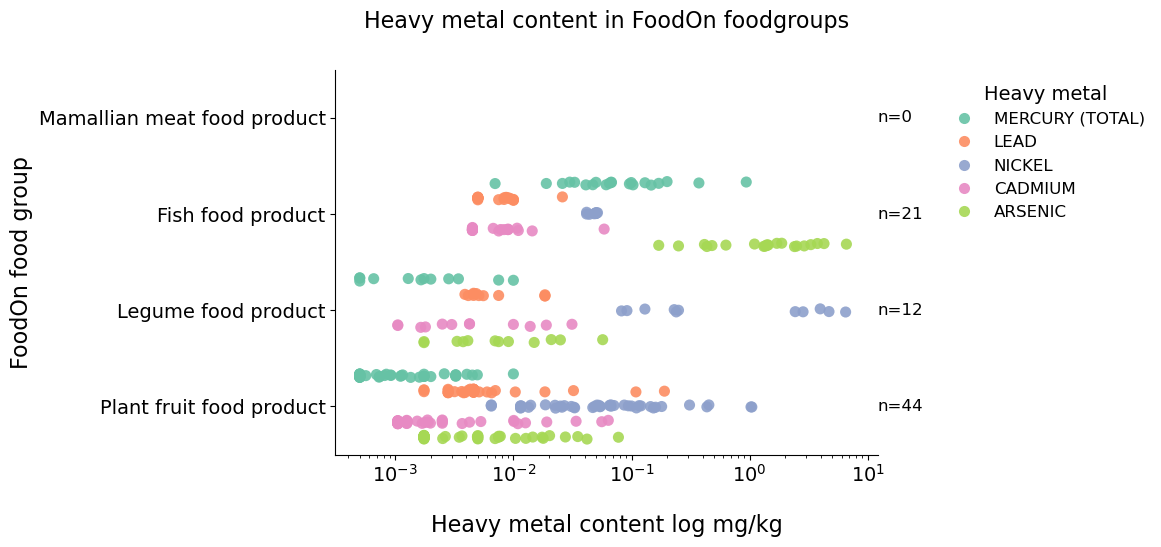

In [34]:
plt.figure(figsize=(7, 5))   # taller figure = more space between food groups

path_figure_4c = "/data/BioGrid/bindtf/publication_1/development/figures_revision/stripplot_4c_seperate.svg"
order = ['Mamallian meat food product', 'Fish food product', 'Legume food product', 'Plant fruit food product']

p = sns.stripplot(
    data=result_metal,
    y='grouplabel',
    x='value',
    hue='propertylabel',
    order=order,
    palette='Set2',
    size=8,              # smaller points = thinner category bands
    dodge=True,
    alpha=0.9
)

p.set(xscale="log")


sns.despine()

plt.legend(loc='upper left', bbox_to_anchor=(1.1, 1),
           title='Heavy metal', fontsize=12, title_fontsize=14, frameon=False)

plt.title('Heavy metal content in FoodOn foodgroups', pad=30, fontsize=16)
plt.xlabel('Heavy metal content log mg/kg', labelpad=20, fontsize=16)
plt.ylabel('FoodOn food group', fontsize=16)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


# --- Add counts (n) on the right side of each category ---
counts = result_metal.groupby("grouplabel")["foodname"].nunique()
empty_row = pd.Series([0], index=["Mamallian meat food product"])

# Prepend it to counts
counts = pd.concat([empty_row, counts])

ax = plt.gca()

# Get maximum x-value to place labels slightly outside the plot
xmax = ax.get_xlim()[1]

for i, group in enumerate(order):
    n = counts[group]
    ax.text(
        xmax + xmax*0.15,      # small offset outside the axis
        i,                     # y-position (category index)
        f"n={n}",
        va='center',
        ha='left',
        fontsize=12
    )

# Extend x-axis to make space for text
ax.set_xlim(right=xmax * 1.15)


plt.savefig(path_figure_4c, format='svg', bbox_inches="tight", transparent = True)


In [ ]:

# --- Add counts (n) on the right side of each category ---
counts = result_metal.groupby("grouplabel")["foodname"].nunique()
empty_row = ["Mammallian meat food product", 0]

empty_row = pd.Series([0], index=["Mammallian meat food product"])

# Prepend it to counts
counts = pd.concat([empty_row, counts])
counts

Mammallian meat food product     0
Fish food product               21
Legume food product             12
Plant fruit food product        44
dtype: int64

#### Use-case 2: Personalized nutrition


In [39]:
endpoint = "http://localhost:3030/response_check/sparql"
query_nut_allergy = open_query("queries/publication/personalized_nutrition_nut.rq")
result_nut_allergy = sparql_query_to_dataframe(query_nut_allergy, endpoint = endpoint)
display(result_nut_allergy)

,foodname,proteinvalue,nutunit,impactfoodname,roundedWarmingValue,impactunit,impactRoundProteinRatio
0,Wheat germ,31.0,g,wheat germ,0.95,kg CO2 eq,0.03
1,Breakfast cereal porridge Olvarit fijne granen...,12.4,g,breakfast cereal cornflakes,0.78,kg CO2 eq,0.06
2,Breakfast cereal All-Bran Plus Kellogg's,14.0,g,breakfast cereal cornflakes,0.78,kg CO2 eq,0.06
3,Oatmeal,12.8,g,oatmeal,0.96,kg CO2 eq,0.07
4,Sesame seeds,26.0,g,sesame seed,2.19,kg CO2 eq,0.08
5,Linseeds,19.0,g,linseeds,1.86,kg CO2 eq,0.1


#### Use-case 3, infer knowledge on similar items

In [ ]:
endpoint = "http://localhost:3030/response_check/sparql"
query = open_query("queries/publication/get_taxons.rq")
results_taxons = sparql_query_to_dataframe(query, endpoint = endpoint)
# If the query takes too long, please use "final_query.csv" as workaround

In [ ]:
# Workaround for long query time
results_taxons = pd.read_csv("../quickdata/final_query.csv")
results_taxons

,ncbilabel,classlabel,queryclasslabel,ingredientlabel,restriction_ex,any_taxon,fooditem
0,Cocos nucifera,coconut food product,coconut oil,coconut oil,derive from,http://purl.obolibrary.org/obo/NCBITaxon_13894,https://data.rivm.nl/data/nvip/bigfood/leda/in...
1,Cocos nucifera,coconut food product,coconut oil,coconut oil,derive from,http://purl.obolibrary.org/obo/NCBITaxon_13894,https://data.rivm.nl/data/nvip/bigfood/leda/in...
2,Avena sativa,oat food product,oat fibre,oat fiber,derive from,http://purl.obolibrary.org/obo/NCBITaxon_4498,https://data.rivm.nl/data/nvip/bigfood/leda/in...
3,Avena sativa,oat food product,oat fibre,oat fiber,derive from,http://purl.obolibrary.org/obo/NCBITaxon_4498,https://data.rivm.nl/data/nvip/bigfood/leda/in...
4,Avena sativa,oat food product,oat fibre,oat fiber,derive from,http://purl.obolibrary.org/obo/NCBITaxon_4498,https://data.rivm.nl/data/nvip/bigfood/leda/in...
...,...,...,...,...,...,...,...
93,Glycine max,soybean,soy chunks,soy chunks,product derived from other product,http://purl.obolibrary.org/obo/NCBITaxon_3847,https://data.rivm.nl/data/nvip/bigfood/leda/in...
94,Glycine max,soybean,soy structure,soy structure,product derived from other product,http://purl.obolibrary.org/obo/NCBITaxon_3847,https://data.rivm.nl/data/nvip/bigfood/leda/in...
95,Glycine max,soybean,soy structure,soy structure,product derived from other product,http://purl.obolibrary.org/obo/NCBITaxon_3847,https://data.rivm.nl/data/nvip/bigfood/leda/in...
96,Glycine max,soybean,soy structure,soy structure,product derived from other product,http://purl.obolibrary.org/obo/NCBITaxon_3847,https://data.rivm.nl/data/nvip/bigfood/leda/in...


In [ ]:
group_ncbilabel = results_taxons.drop_duplicates(["ncbilabel", "fooditem"])
group_ncbilabel = group_ncbilabel.groupby("ncbilabel").count().sort_values("classlabel", ascending=False)
group_ncbilabel

,classlabel,queryclasslabel,ingredientlabel,restriction_ex,any_taxon,fooditem
ncbilabel,,,,,,
Glycine max,15,15,15,15,15,15
Helianthus annuus,11,11,11,11,11,11
Allium cepa,8,8,8,8,8,8
Fabaceae,6,6,6,6,6,6
Allium sativum,4,4,4,4,4,4
Solanum lycopersicum,4,4,4,4,4,4
Solanum tuberosum,4,4,4,4,4,4
Zea mays,3,3,3,3,3,3
Avena sativa,3,3,3,3,3,3


In [10]:
endpoint = "http://localhost:3030/response_check/sparql"
query = open_query("queries/publication/usecase3_alliumv3.rq")
results_allium = sparql_query_to_dataframe(query, endpoint = endpoint)
results_allium = results_allium.dropna()
results_allium


,ncbilabel,class,classlabel,queryclasslabel,datasetlabel,dataavailable
0,Allium cepa,http://purl.obolibrary.org/obo/FOODON_03316347,onion,onion (raw),onions raw,LCA data available
1,Allium cepa,http://purl.obolibrary.org/obo/FOODON_03316347,onion,onion,onions,LCA data available
2,Allium cepa,http://purl.obolibrary.org/obo/FOODON_03316347,onion,onion (raw),Onions raw,Nutrient data available
3,Allium cepa,http://purl.obolibrary.org/obo/FOODON_03316347,onion,onion,Onions boiled,Nutrient data available
4,Allium cepa,http://purl.obolibrary.org/obo/FOODON_03316347,onion,welsh onion (raw),Onion Welsh raw,Nutrient data available
5,Allium cepa,http://purl.obolibrary.org/obo/FOODON_03316347,onion,welsh onion,Onion Welsh boiled,Nutrient data available
6,Allium cepa,http://purl.obolibrary.org/obo/FOODON_03316347,onion,cocktail onion,"ONION, INCLUDING PEARL/COCKTAIL ONION",Chemical foodsafety data available


In [11]:
endpoint = "http://localhost:3030/response_check/sparql"
query = open_query("queries/publication/usecase3_glycinev3.rq")
results_glycine = sparql_query_to_dataframe(query, endpoint = endpoint)
results_glycine = results_glycine[results_glycine["classlabel"].isin(["soybean seed (field) food product"])] # Soybean seed (field) food product occurs for every soybean
results_glycine = results_glycine.dropna()
results_glycine

,ncbilabel,class,classlabel,queryclasslabel,datasetlabel,dataavailable
0,Glycine max,http://purl.obolibrary.org/obo/FOODON_00002265,soybean seed (field) food product,tofu food product,tahoe soya curd,LCA data available
6,Glycine max,http://purl.obolibrary.org/obo/FOODON_00002265,soybean seed (field) food product,soy yogurt,Yoghurt soybased w fruit/vanilla,Nutrient data available
7,Glycine max,http://purl.obolibrary.org/obo/FOODON_00002265,soybean seed (field) food product,soy yogurt,Yoghurt soybased unsweetened,Nutrient data available
8,Glycine max,http://purl.obolibrary.org/obo/FOODON_00002265,soybean seed (field) food product,soy yogurt,Yoghurt soybased,Nutrient data available
9,Glycine max,http://purl.obolibrary.org/obo/FOODON_00002265,soybean seed (field) food product,tempeh,Tempeh fermented soya beans prepared wo fat,Nutrient data available
10,Glycine max,http://purl.obolibrary.org/obo/FOODON_00002265,soybean seed (field) food product,soy yogurt,Tahoe soya curd,Nutrient data available
12,Glycine max,http://purl.obolibrary.org/obo/FOODON_00002265,soybean seed (field) food product,soybean,SOY BEAN,Chemical foodsafety data available
15,Glycine max,http://purl.obolibrary.org/obo/FOODON_00002265,soybean seed (field) food product,miso,Miso soya paste,Nutrient data available
16,Glycine max,http://purl.obolibrary.org/obo/FOODON_00002265,soybean seed (field) food product,soybean flour,Flour soya full fat,Nutrient data available
17,Glycine max,http://purl.obolibrary.org/obo/FOODON_00002265,soybean seed (field) food product,soybean flour (defatted),Flour soya defatted,Nutrient data available


In [12]:
endpoint = "http://localhost:3030/response_check/sparql"
query = open_query("queries/publication/usecase3_annuusv3.rq")
results_helianthus = sparql_query_to_dataframe(query, endpoint = endpoint)
results_helianthus = results_helianthus.dropna()
results_helianthus

,ncbilabel,class,classlabel,queryclasslabel,datasetlabel,dataavailable
0,Helianthus annuus,http://purl.obolibrary.org/obo/FOODON_00002294,sunflower food product,sunflower seed oil,sunflower oil,LCA data available
1,Helianthus annuus,http://purl.obolibrary.org/obo/FOODON_00002294,sunflower food product,sunflower seed oil,SUNFLOWER OIL,Chemical foodsafety data available
2,Helianthus annuus,http://purl.obolibrary.org/obo/FOODON_00002294,sunflower food product,sunflower seed (whole kernel),SUNFLOWER KERNEL,Chemical foodsafety data available
3,Helianthus annuus,http://purl.obolibrary.org/obo/FOODON_00003581,sunflower seed (whole kernel),sunflower seed (whole kernel),SUNFLOWER KERNEL,Chemical foodsafety data available
4,Helianthus annuus,http://purl.obolibrary.org/obo/FOODON_00002294,sunflower food product,sunflower seed oil,Oil sunflower seed,Nutrient data available


In [23]:
ingredient_concat = results_taxons[results_taxons["ncbilabel"].isin(['Helianthus annuus', 'Allium cepa', 'Glycine max'])].sort_values("ncbilabel")
ingredient_concat["dataavailable"] = "Ingredient data available"
ingredient_concat = ingredient_concat[["ncbilabel", "classlabel", "queryclasslabel", "ingredientlabel", "dataavailable"]]
ingredient_concat = ingredient_concat.rename({ "ingredientlabel": "datasetlabel"}, axis = 1)
ingredient_concat = ingredient_concat.drop_duplicates(["ncbilabel", "datasetlabel"])
ingredient_concat

,ncbilabel,classlabel,queryclasslabel,datasetlabel,dataavailable
41,Allium cepa,onion,onion,onion,Ingredient data available
40,Allium cepa,onion,onion,sliced onion,Ingredient data available
87,Glycine max,soybean,soy protein,soy protein,Ingredient data available
60,Glycine max,soybean,soybean,soybeans,Ingredient data available
91,Glycine max,soybean,soy protein isolate,isolated soy protein,Ingredient data available
92,Glycine max,soybean,soy protein rehydrated,rehydrated soy protein,Ingredient data available
93,Glycine max,soybean,soy chunks,soy chunks,Ingredient data available
94,Glycine max,soybean,soy structure,soy structure,Ingredient data available
6,Helianthus annuus,sunflower food product,sunflower seed oil,sunflower oil,Ingredient data available
15,Helianthus annuus,sunflower food product,sunflower seed protein,sunflower seed protein,Ingredient data available


In [13]:
# Concat the information coming from the different subqueries for visualisation
final_usecase = pd.concat([results_glycine, results_helianthus, results_allium, ingredient_concat])
final_usecase = final_usecase[["ncbilabel", "queryclasslabel", "datasetlabel", "dataavailable"]]
final_usecase = final_usecase.drop_duplicates()
final_usecase.sort_values(["ncbilabel", "queryclasslabel", "dataavailable"]).reset_index(drop = True)

,ncbilabel,queryclasslabel,datasetlabel,dataavailable
0,Allium cepa,cocktail onion,"ONION, INCLUDING PEARL/COCKTAIL ONION",Chemical foodsafety data available
1,Allium cepa,onion,onion,Ingredient data available
2,Allium cepa,onion,sliced onion,Ingredient data available
3,Allium cepa,onion,onions,LCA data available
4,Allium cepa,onion,Onions boiled,Nutrient data available
5,Allium cepa,onion (raw),onions raw,LCA data available
6,Allium cepa,onion (raw),Onions raw,Nutrient data available
7,Allium cepa,welsh onion,Onion Welsh boiled,Nutrient data available
8,Allium cepa,welsh onion (raw),Onion Welsh raw,Nutrient data available
9,Glycine max,miso,Miso soya paste,Nutrient data available


/mnt/scratch_dir/bindtf/bigfood/nicekg_analysis/analysis/functions/vis_helper.py:221: UserWarning: 

The connectionstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default values.
Note that using FancyArrowPatches may be slow for large graphs.

  nx.draw_networkx_edges(G, pos,
/mnt/scratch_dir/bindtf/bigfood/nicekg_analysis/analysis/functions/vis_helper.py:232: UserWarning: 

The connectionstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default values.
Note that using FancyArrowPatches may be slow for large graphs.

  nx.draw_networkx_edges(G, pos,


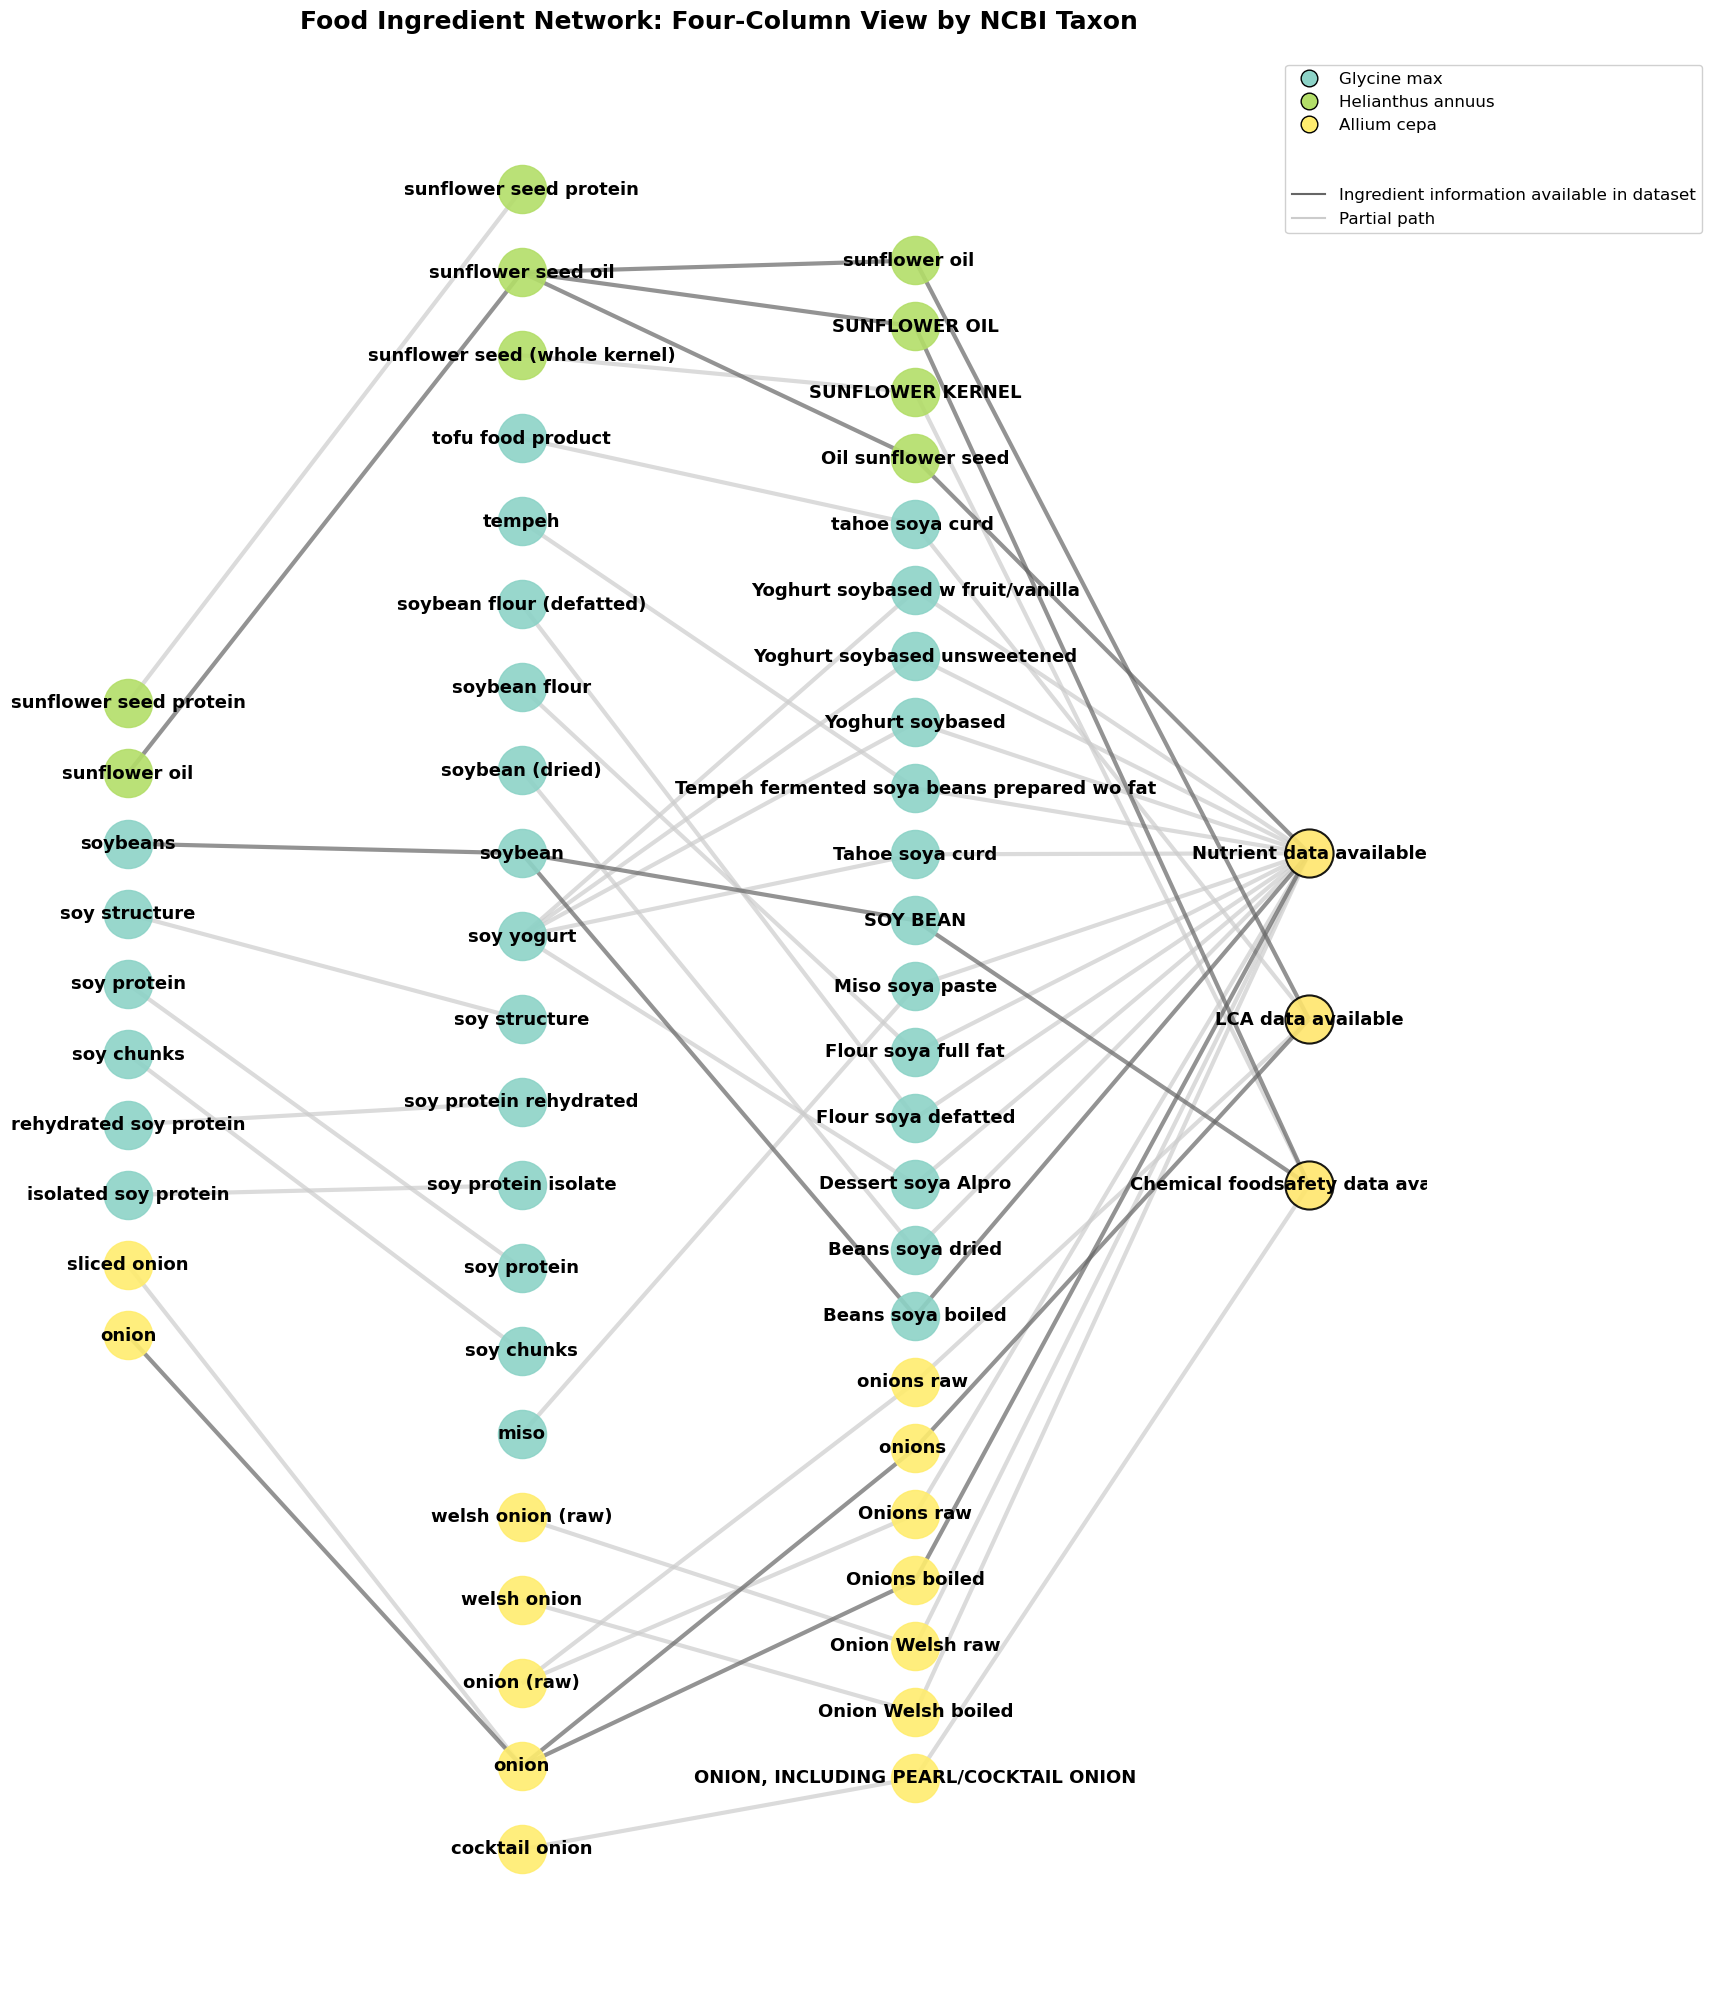

Network Statistics:
Total nodes: 58
Total edges: 58

Node counts by type:
  ingredient: 10
  class: 21
  other: 24
  datatype: 3

Taxa represented: Glycine max, Helianthus annuus, Allium cepa


In [17]:
from functions.vis_helper import create_network_plot

create_network_plot(final_usecase)
# Figure was further adjusted in powerpoint, for missing links (all links available in table)

## Supplementary information 

In [21]:
group_ingredient = results_taxons.drop_duplicates(["ingredientlabel", "fooditem"]) 
group_ingredient = group_ingredient.groupby("ingredientlabel").count().sort_values("ncbilabel", ascending = False)
group_ingredient

,ncbilabel,classlabel,queryclasslabel,restriction_ex,any_taxon,fooditem
ingredientlabel,,,,,,
sunflower oil,10,10,10,10,10,10
onion,7,7,7,7,7,7
soy protein,6,6,6,6,6,6
garlic,4,4,4,4,4,4
potato starch,3,3,3,3,3,3
soy structure,3,3,3,3,3,3
oat fiber,3,3,3,3,3,3
soybeans,3,3,3,3,3,3
peas,2,2,2,2,2,2


In [22]:
results_taxons[["ingredientlabel", "ncbilabel"]].drop_duplicates().sort_values("ingredientlabel").reset_index(drop = True)

,ingredientlabel,ncbilabel
0,barley malt,Hordeum vulgare
1,barley malt extract,Hordeum vulgare
2,basil,Ocimum basilicum
3,celery,Apium graveolens
4,chickpeas,Cicer arietinum
5,chickpeas,Fabaceae
6,chives,Allium schoenoprasum
7,coconut oil,Cocos nucifera
8,coriander,Coriandrum sativum
9,corn,Zea mays subsp. mays
